In [15]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 19 11:45:20 2016

@author: johnguttag

Modified: egrimson
"""

import random, pylab, numpy
import matplotlib.pyplot as plt

In [ ]:
#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() #discard header
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)
    
def labelPlot():
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  #acc. due to gravity
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured displacements')
    labelPlot()
    
def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured points')
    labelPlot()                 
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*pylab.array(xVals) + b
    print('a =', a, 'b =', b)
    pylab.plot(xVals, estYVals, 'r',
               label = 'Linear fit, k = '
               + str(round(1/a, 5)))
    pylab.legend(loc = 'best')
    
fitData('MIT_60002/springData.txt')

 

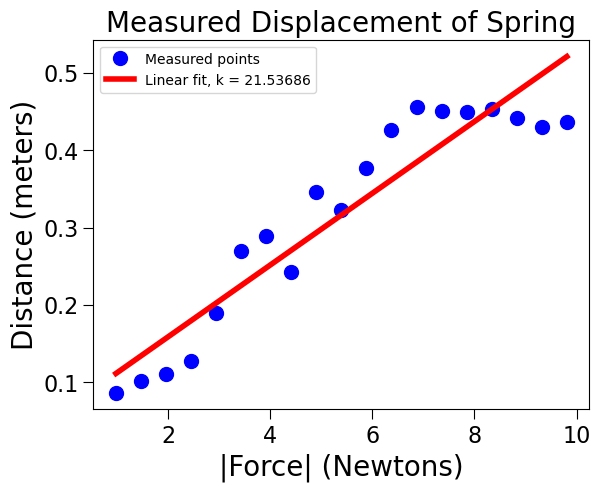

In [5]:
  
def fitData1(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured points')
    labelPlot()                 
    model = pylab.polyfit(xVals, yVals, 1)
    estYVals = pylab.polyval(model, xVals)
    pylab.plot(xVals, estYVals, 'r',
               label = 'Linear fit, k = '
               + str(round(1/model[0], 5)))
    pylab.legend(loc = 'best')

fitData1('MIT_60002/springData.txt')

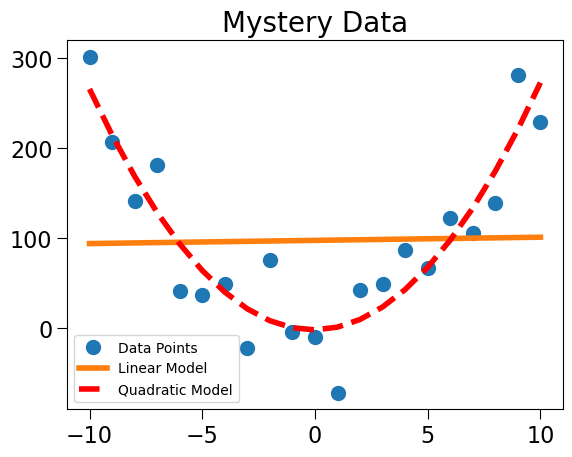

In [7]:
#Demonstration using mystery data

xVals, yVals = getData('MIT_60002/mysteryData.txt')
pylab.plot(xVals, yVals, 'o', label = 'Data Points')
pylab.title('Mystery Data')

#Try linear model
model1 = pylab.polyfit(xVals, yVals, 1)
pylab.plot(xVals, pylab.polyval(model1, xVals),
          label = 'Linear Model')

#Try a quadratic model
model2 = pylab.polyfit(xVals, yVals, 2)
pylab.plot(xVals, pylab.polyval(model2, xVals),
          'r--', label = 'Quadratic Model')
pylab.legend()

#Compare models

In [8]:
def aveMeanSquareError(data, predicted):
    error = 0.0
    for i in range(len(data)):
        error += (data[i] - predicted[i])**2
    return error/len(data)

#code to compare fits for mystery data
estYVals = pylab.polyval(model1, xVals)  
print('Ave. mean square error for linear model =',
     aveMeanSquareError(yVals, estYVals))
estYVals = pylab.polyval(model2, xVals)
print('Ave. mean square error for quadratic model =',
     aveMeanSquareError(yVals, estYVals))

Ave. mean square error for linear model = 9372.730789652878
Ave. mean square error for quadratic model = 1524.0204471835434


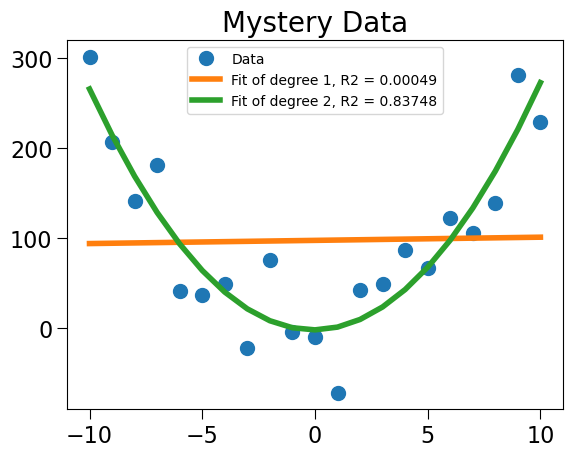

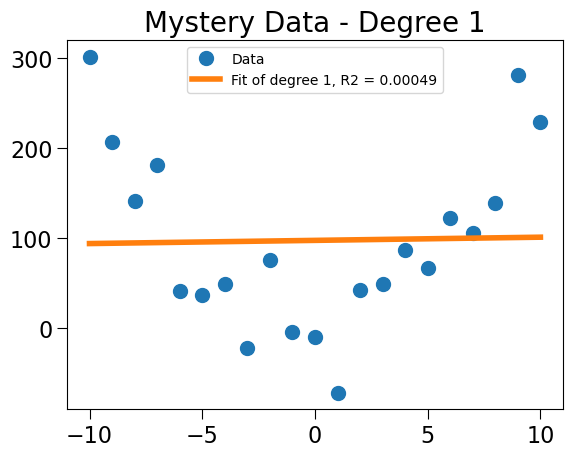

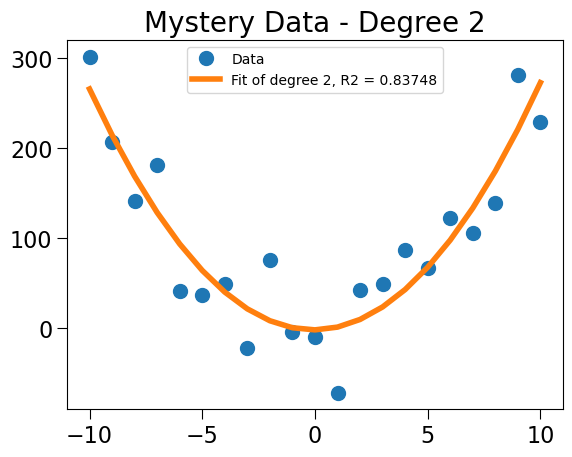

In [28]:
# R2 indicates how well the independent variable(s) predict the variation in the dependent variable.
# The formula for r2 is sum of square residuals / sum of squares 
# sum of squares = #differences between the observed values and the mean of the dependent variable

def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum() # sum squared residuals
    meanError = error/len(observed)
    return 1 - (meanError/numpy.var(observed)) #var of observed is sum of squares 
                                                
def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

def testFits(models, degrees, xVals, yVals, title):
    pylab.plot(xVals, yVals, 'o', label = 'Data')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        
        pylab.plot(xVals, estYVals,
                   label = 'Fit of degree '\
                   + str(degrees[i])\
                   + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)

    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        
        #create new plot for each figure
        plt.figure()
        plt.plot(xVals, yVals, 'o', label='Data')
        plt.plot(xVals, estYVals,
                 label='Fit of degree ' + str(degrees[i]) + ', R2 = ' + str(round(error, 5)))
        plt.legend(loc='best')
        plt.title(title + ' - Degree ' + str(degrees[i]))

    # Show all plots
    plt.show()
        
   

#code for testing goodness of fit to parabolic data

xVals, yVals = getData('MIT_60002/mysteryData.txt')
degrees = (1, 2)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

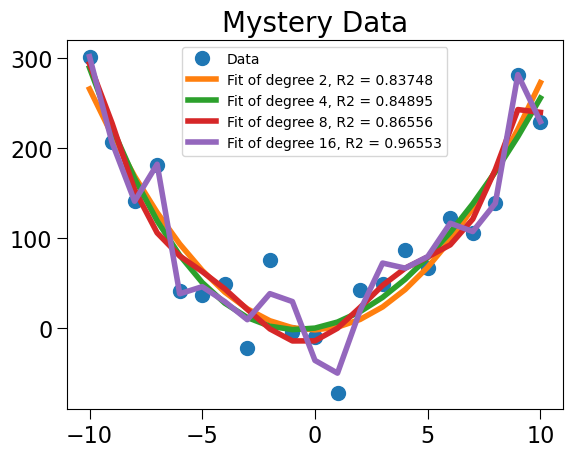

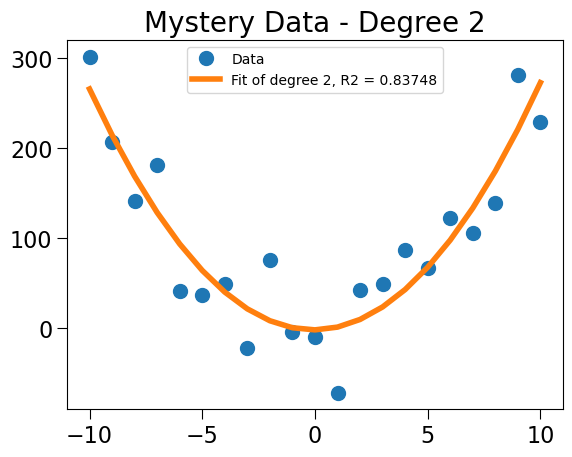

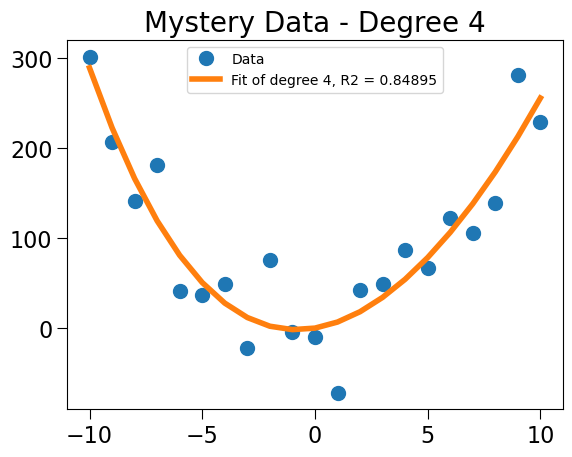

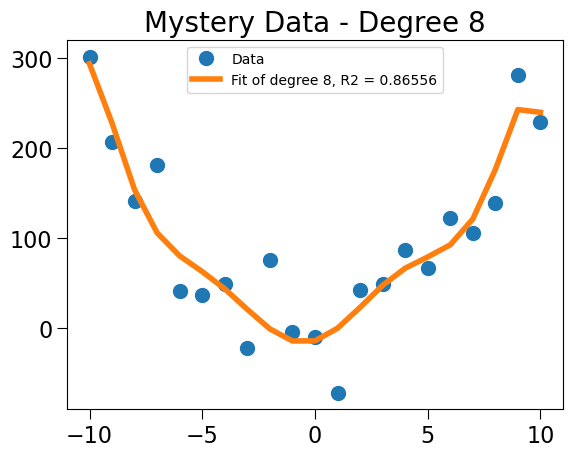

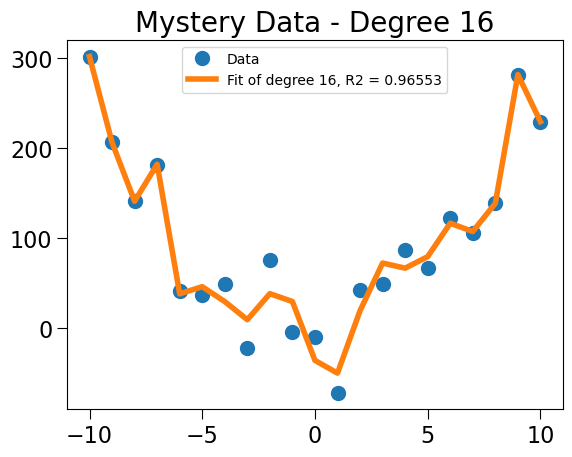

In [29]:
#Compare higher-order fits
degrees = (2, 4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

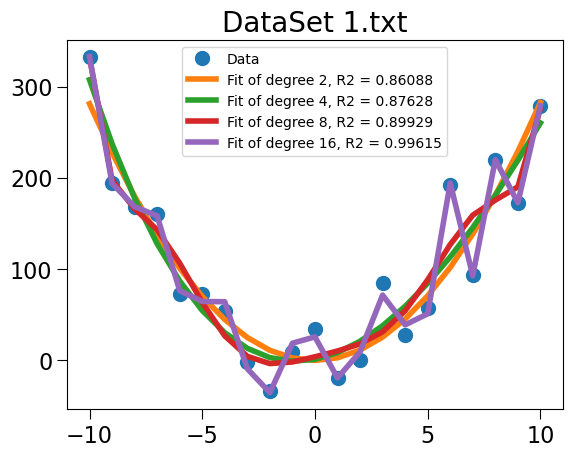

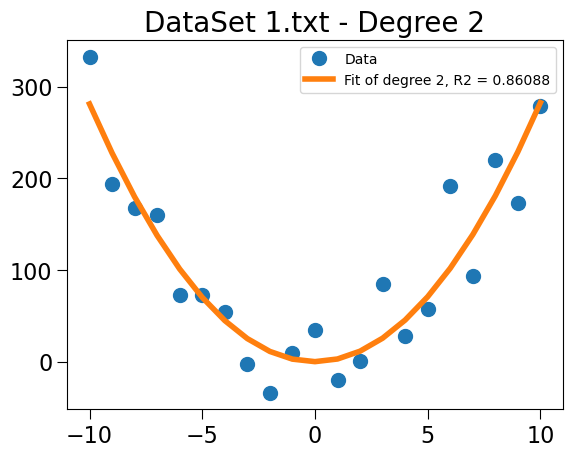

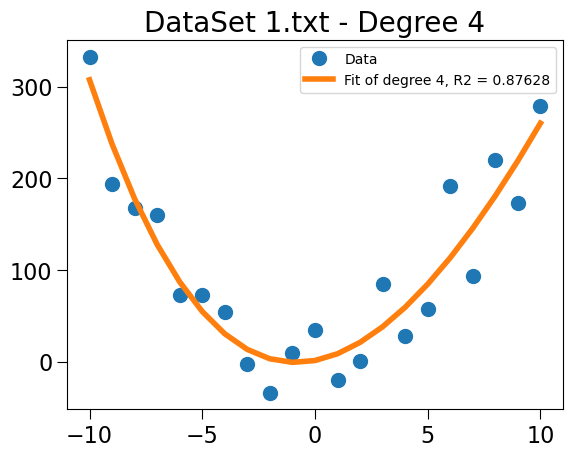

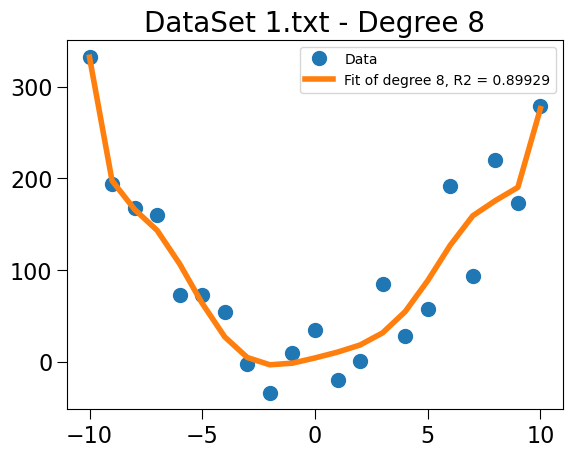

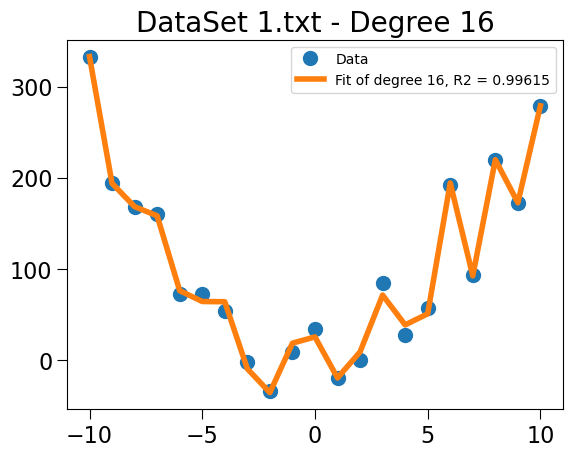

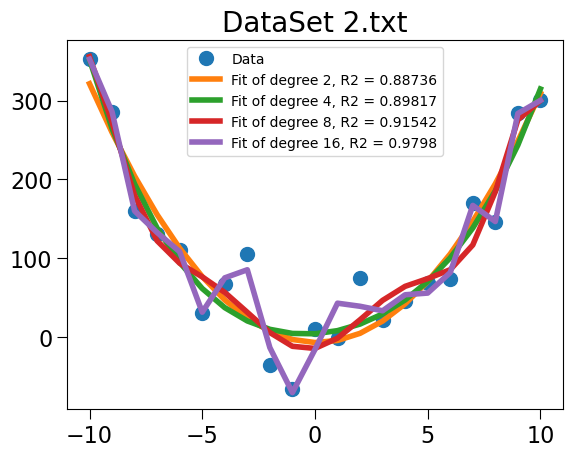

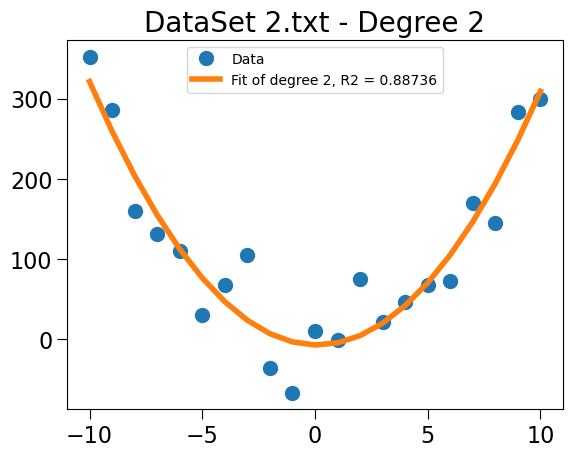

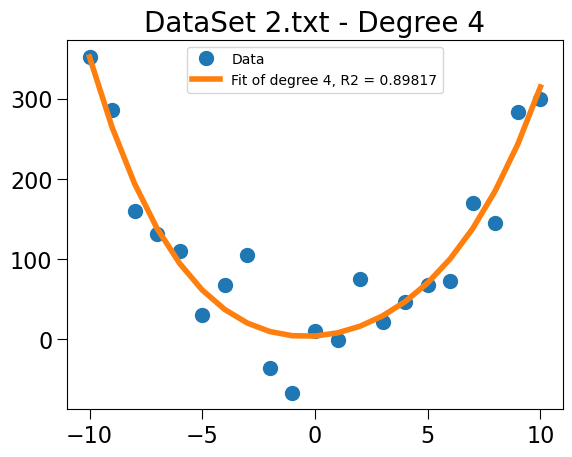

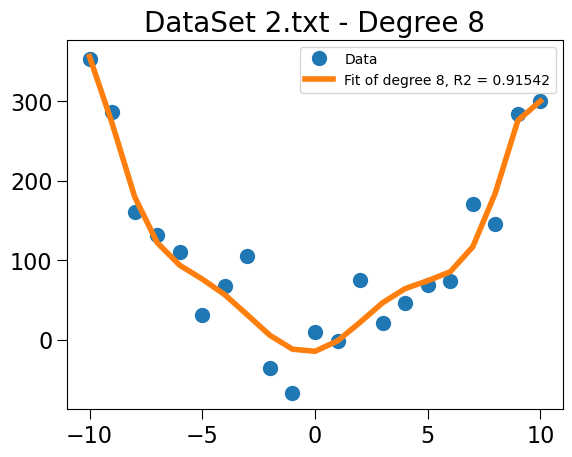

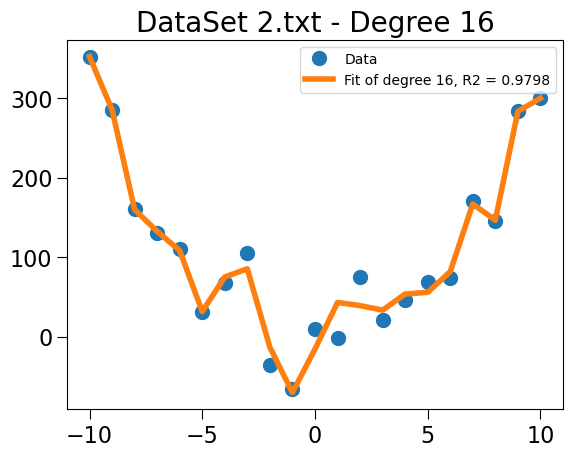

In [30]:
def genNoisyParabolicData(a, b, c, xVals, fName):
    yVals = []
    for x in xVals:
        theoreticalVal = a*x**2 + b*x + c
        yVals.append(theoreticalVal\
        + random.gauss(0, 35))
    f = open(fName,'w')
    f.write('x        y\n')
    for i in range(len(yVals)):
        f.write(str(yVals[i]) + ' ' + str(xVals[i]) + '\n')
    f.close()
    
#parameters for generating data
xVals = range(-10, 11, 1)
a, b, c = 3.0, 0.0, 0.0
degrees = (2, 4, 8, 16)

#generate data
random.seed(0)
genNoisyParabolicData(a, b, c, xVals,
                     'Dataset 1.txt')
genNoisyParabolicData(a, b, c, xVals,
                     'Dataset 2.txt')

xVals1, yVals1 = getData('Dataset 1.txt')
models1 = genFits(xVals1, yVals1, degrees)
testFits(models1, degrees, xVals1, yVals1,
       'DataSet 1.txt')

pylab.figure()
xVals2, yVals2 = getData('Dataset 2.txt')
models2 = genFits(xVals2, yVals2, degrees)
testFits(models2, degrees, xVals2, yVals2,
        'DataSet 2.txt')

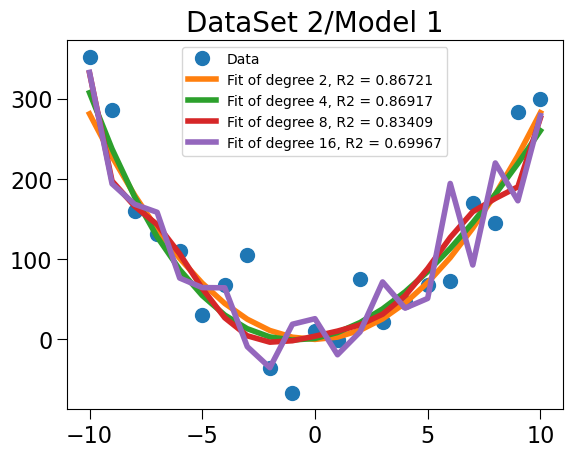

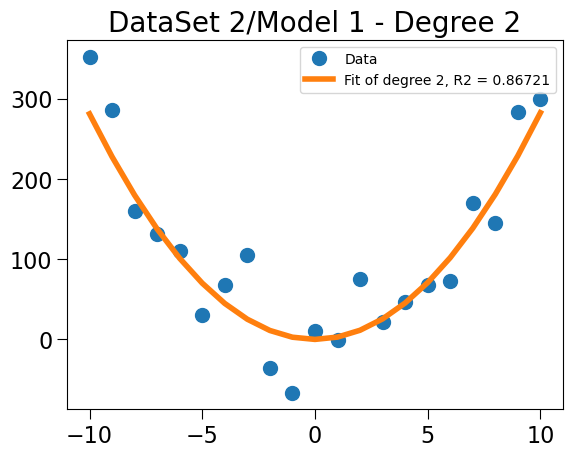

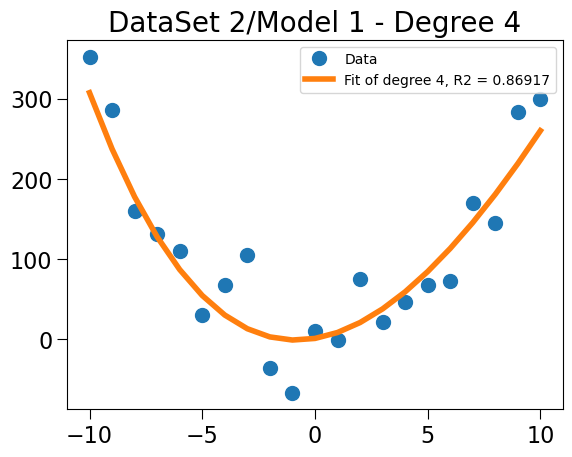

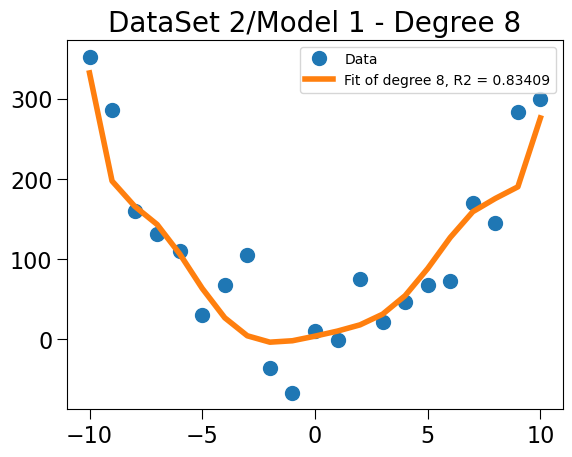

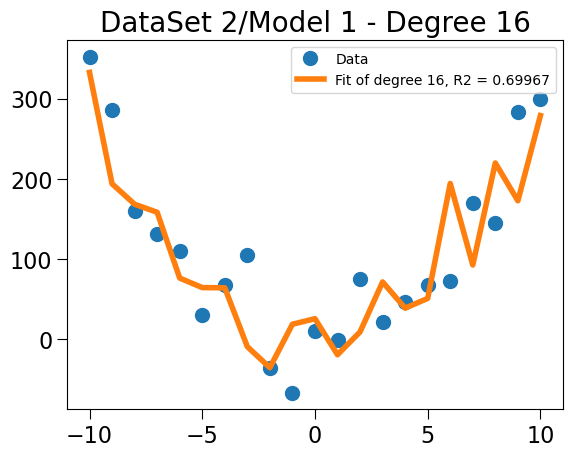

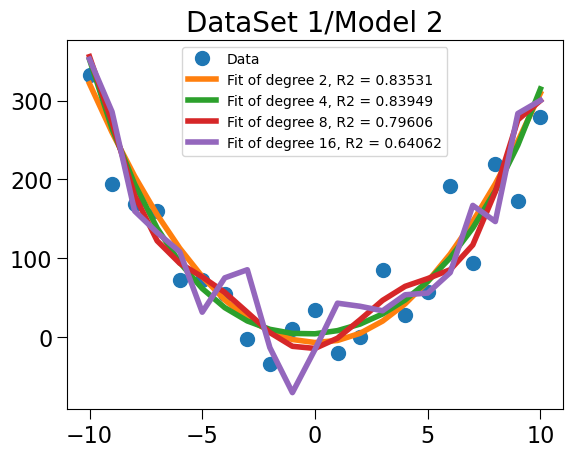

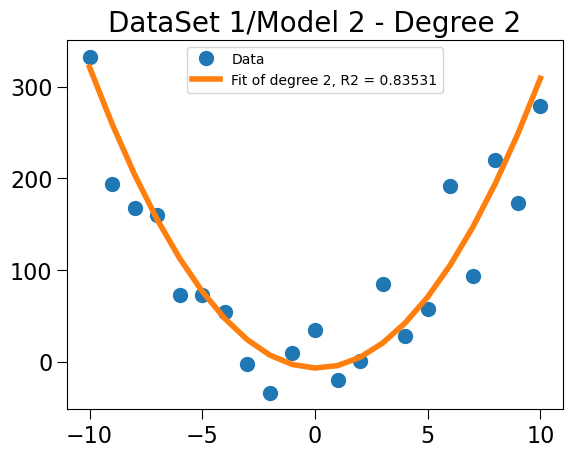

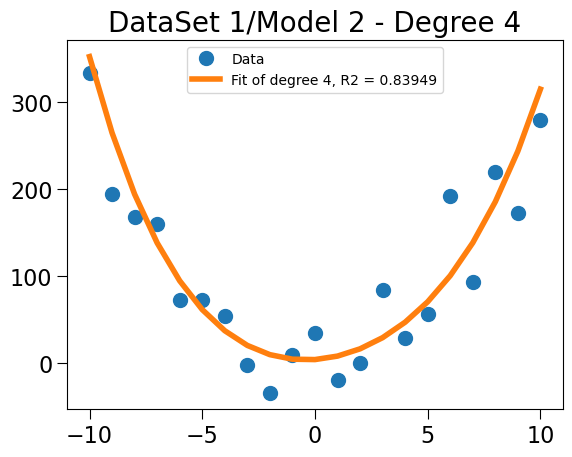

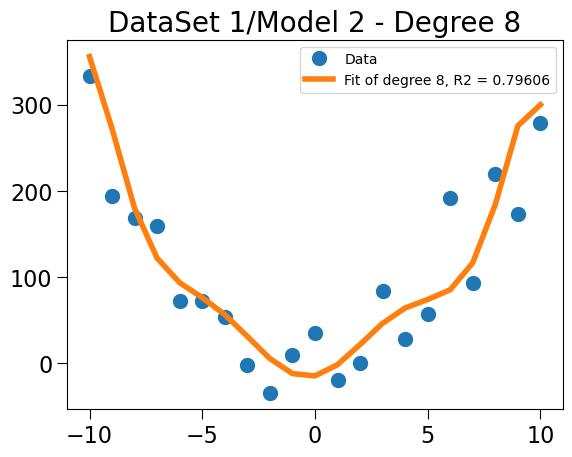

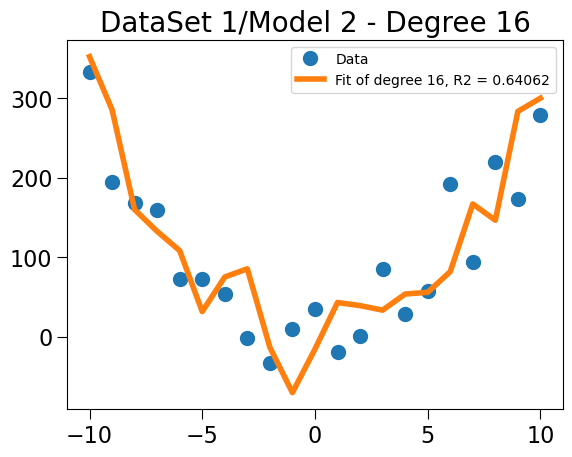

In [31]:
pylab.figure()
testFits(models1, degrees, xVals2, yVals2,
        'DataSet 2/Model 1')
pylab.figure()
testFits(models2, degrees, xVals1, yVals1,
        'DataSet 1/Model 2')

## We are seeing overfitting 

a = -0.0 b = 1.0 c = -0.0
R-squared =  1.0


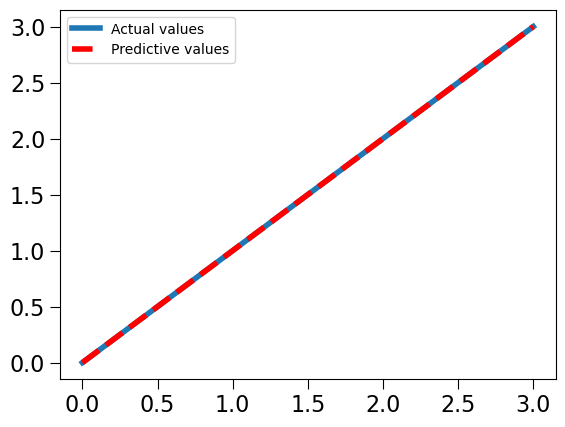

In [32]:
#a line
xVals = (0,1,2,3)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
a,b,c = pylab.polyfit(xVals, yVals, 2)
print('a =', round(a, 4), 'b =', round(b, 4),
     'c =', round(c, 4))
estYVals = pylab.polyval((a,b,c), xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predictive values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

R-squared =  1.0


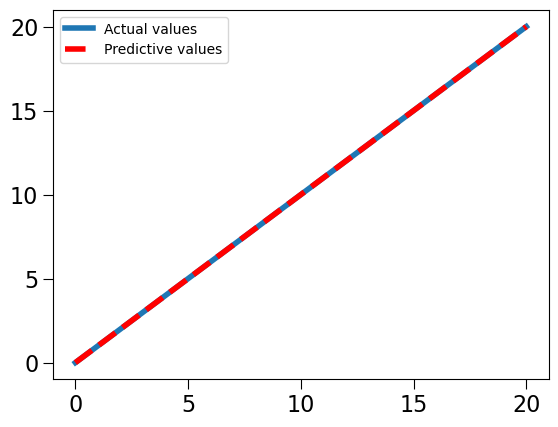

In [33]:
#OPEN FOR SECOND DEMO
#
pylab.figure()
#Extend domain
xVals = xVals + (20,)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
estYVals = pylab.polyval((a,b,c), xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predictive values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

[0.025 0.955 0.005]
R-squared =  0.9999057936881771


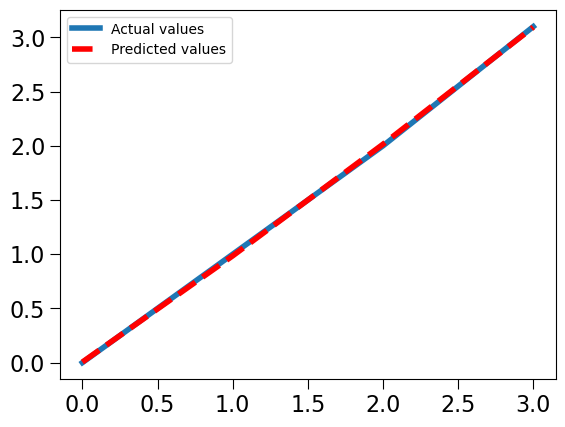

In [34]:
#OPEN FOR THIRD DEMO
#almost a line
pylab.figure()
xVals = (0,1,2,3)
yVals = (0,1,2,3.1)
pylab.plot(xVals, yVals, label = 'Actual values')
model = pylab.polyfit(xVals, yVals, 2)
print(model)
estYVals = pylab.polyval(model, xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predicted values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

R-squared =  0.7026164813486463


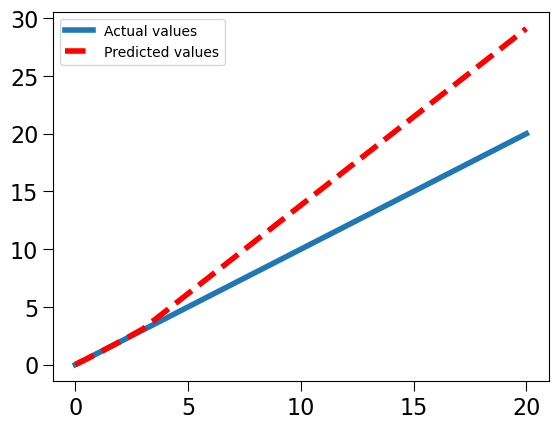

In [35]:
#OPEN FOR FOURTH DEMO

pylab.figure()
#Extend domain
xVals = xVals + (20,)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
estYVals = pylab.polyval(model, xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predicted values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')